# Training Set

In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
%matplotlib inline

from tqdm import tqdm
# from time import sleep

### Read raw training data

In [547]:
# OS PATH'/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/raw_data_train.csv'
# WINDOWS PATH "C:/Users/randa/Documents/MLdataset/amazon_data/raw_data_train.csv"
amazon = pd.read_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/raw_data_train.csv')
print(amazon.shape)

(364000, 14)


In [548]:
print(amazon.head())
print(amazon['helpful'].mean())

   Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
0      161979        251062  251063  B002INDU22  A16M0DLZ493518   
1       72164        206109  206110  B0050JLAEQ  A2B940BLM1T0V3   
2      452002        334972  334973  B003D4MW38  A2I8UYFVJ5TLHT   
3      419090        119275  119276  B003Z7VYXW  A1YC6AYVXK7NRQ   
4      304509         90726   90727  B003OB4BOS  A29NOSP1RGTQNK   

         ProfileName  HelpfulnessNumerator  HelpfulnessDenominator  Score  \
0            do-good                     0                       0      4   
1              donna                     0                       0      5   
2         greenie227                     1                       1      5   
3  DesDaz "torr0015"                     2                       2      5   
4               Josh                     0                       0      4   

         Time                           Summary  \
0  1331337600                             Works   
1  1348617600    She loves, it, 

# Remove Stopwords

In [63]:
# from gensim.parsing.preprocessing import remove_stopwords
# # remove stop words in amazon.Text
# amazon['Text'] = amazon['Text'].apply(remove_stopwords)
# #newText = amazon['Text'].apply(remove_stopwords)
# print(amazon.Text)



0         We tried I worried work. They work well. My fa...
1         My vet recommended 11 year old cat change diet...
2         This terrific tea. I bought iced tea, it's got...
3         I excellent results yeast. When I opened packa...
4         I wasn't disappointed, enjoys spicy food 'pica...
5         My mom Bustelo cafe like old neighborhood. One...
6         I tried samples liked them. However, I tried c...
7         I discovered sweetener couple months ago huge ...
8         Rooibos tea great healing skin conditions it's...
9         I use Kretschmer Wheatgerm homemade granola re...
10        These best hazelnuts I've years. They fresh, c...
11        I Jamba Juice Match green tea shots...after tr...
12        These black ink black we're seeing canned blac...
13        I highly recommend these. They tasted great! I...
14        I bought package 10 month old practice self fe...
15        I bought thinking taste like peppermint patty,...
16        I buy 2 packs daily $5 pack. W

In [551]:
#Lemmatization 



# import nltk
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer 
#Init the Wordnet Lemmatizer
# lemmatizer = WordNetLemmatizer()

#print(amazon['Text'][0])
#print(lemmatizer.lemmatize(amazon['Text'][0]))

#gensim lemmatize needs pattern, but it is only support python 2.7 or 3.6 below

from gensim.utils import lemmatize
print('**************************************************')
print(lemmatize('Hello World! How is it going?!'))


# lemmAmazon=[]
# for x in amazon['Text']:
#     #for y in amazon['Text'][x]:
#     lemmAmazon.append([wd.decode('utf-8').split('/')[0] for wd in lemmatize(x)])
# print(lemmAmazon)


    
# [wd.decode('utf-8').split('/')[0] for wd in lemmatize('Hello World! How is it going?!')]
# amazon['Text'] = amazon['Text'].apply(lemmatize)
# print(amazon.Text.head())


# leText=newText.apply(lemmatizer.lemmatize)
# print(lemmatizer.lemmatize("my bats"))


# too slow
# for i,w in tqdm(enumerate(amazon['Text'])):
#     amazon['Text'][i] = [[wd.decode('utf-8').split('/')[0] for wd in lemmatize(w)]]

amaLemma=[]
for w in tqdm(amazon['Text']):
    amaLemma.append([wd.decode('utf-8').split('/')[0] for wd in lemmatize(w)])

**************************************************
[b'world/NN', b'be/VB', b'go/VB']
















  1%|          | 2913/364000 [00:41<51:42, 116.39it/s]

In [552]:
print(amaLemma[0][0])

try


In [553]:
amazon['Text'].tail()


print(len(amaLemma))
print(type(amaLemma))

print(amaLemma[0])
print(amaLemma[1])

amaNp=np.array(amaLemma)
amaDF=pd.DataFrame(amaNp)

amaDF.to_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/AmazonLemmatizedWithStopwords.csv')
print(amaDF)
#amaLemma.to_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/AmazonLemmatized.csv')

# amaLemmaDF = pd.DataFrame(amaLemma, columns=['Text'])



364000
<class 'list'>
['try', 'be', 'worry', 'not', 'work', 'do', 'work', 'well', 'family', 'have', 'love', 'try', 'even', 'enjoy', 'lunch', 'salad', 'dressing', 'just', 'fruit', 'greek', 'yogurt', 'natural', 'tasty', 'pill', 'be', 'hard', 'take', 'few', 'moment', 'melt', 'work', 'right', 'away', 'last', 'minute', 'active', 'eating', 'think', 'acid', 'sour', 'food', 'wash', 'away', 'try', 'again']
['vet', 'recommend', 'year', 'old', 'cat', 'change', 'diet', 'due', 'blood', 'work', 'come', 'back', 'number', 'be', 'slightly', 'elevated', 'vet', 'say', 'help', 'maintain', 'kidney', 'filter', 'properly', 'put', 'special', 'canned', 'food', 'thank', 'god', 'love', 'food', 'purina', 'kidney', 'function', 'seem', 'be', 'be', 'liking', 'thus', 'far', 'tried', 'science', 'diet', 'walk', 'away', 'recommend', 'food', 'pet']
                                                        0
0       [try, be, worry, not, work, do, work, well, fa...
1       [vet, recommend, year, old, cat, change, diet,...
2

In [555]:
print(amaDF.head())
print(type(amaDF))
print(amaDF[0][0])

# print(amaDF[0][0].dtypes)

                                                   0
0  [try, be, worry, not, work, do, work, well, fa...
1  [vet, recommend, year, old, cat, change, diet,...
2  [be, terrific, tea, buy, make, iced, tea, get,...
3  [have, have, excellent, result, yeast, open, f...
4  [wasn, too, disappointed, someone, enjoy, spic...
<class 'pandas.core.frame.DataFrame'>
['try', 'be', 'worry', 'not', 'work', 'do', 'work', 'well', 'family', 'have', 'love', 'try', 'even', 'enjoy', 'lunch', 'salad', 'dressing', 'just', 'fruit', 'greek', 'yogurt', 'natural', 'tasty', 'pill', 'be', 'hard', 'take', 'few', 'moment', 'melt', 'work', 'right', 'away', 'last', 'minute', 'active', 'eating', 'think', 'acid', 'sour', 'food', 'wash', 'away', 'try', 'again']


In [556]:
# lemmAmazon[0]

# jointTest=' '.join(lemmAmazon[0])

amaDFOut = amaDF[0].apply(' '.join)
print(amaDFOut.head())


0    try be worry not work do work well family have...
1    vet recommend year old cat change diet due blo...
2    be terrific tea buy make iced tea get smooth l...
3    have have excellent result yeast open first pa...
4    wasn too disappointed someone enjoy spicy food...
Name: 0, dtype: object


In [557]:
print(amaDFOut[0])
print(amazon["Text"][0])

print(len(amaDFOut))

try be worry not work do work well family have love try even enjoy lunch salad dressing just fruit greek yogurt natural tasty pill be hard take few moment melt work right away last minute active eating think acid sour food wash away try again
We tried these and I was worried that they may not work. They did work well. My family has loved trying them. We even enjoyed our lunch salad no dressing with just fruit and greek yogurt all natural. Tasty.<br />The pill was hard and took a few moments to melt but it worked right away.  It lasted for 20-25 minutes of active eating. I think the acid in the sour foods washes it away. I would try it again.
364000


### Feature extraction on natural language data

### Extraction By CountVecorizer

In [564]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# corpus = amazon.Text.as_matrix()
corpus = amaDFOut.as_matrix()
X_bag_of_words = vectorizer.fit_transform(corpus)
print(X_bag_of_words.toarray())

# corpusForId= amazon.ProductId.as_matrix()
# bagOfId= vectorizer.fit_transform(corpusForId)



/anaconda3/envs/Py36env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [565]:
print(X_bag_of_words.shape)
# print(X_bag_of_words[0])
type(X_bag_of_words)

# print(bagOfId[100])


(364000, 76362)


scipy.sparse.csr.csr_matrix

In [566]:
joblib.dump(vectorizer,'vectorizer.pkl')

['vectorizer.pkl']

### Hashing Vectorizer

In [167]:
# # vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import HashingVectorizer
# # hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
# hv = HashingVectorizer(n_features=2 ** 20, non_negative=True)
# # X_hv = hv.fit_transform(amazon.Text)
# X_hv = hv.fit_transform(amaDFOut)
# print(hv)
# print(X_hv.shape)

/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True,
         n_features=1048576, ngram_range=(1, 1), non_negative=True,
         norm='l2', preprocessor=None, stop_words=None, strip_accents=None,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None)
(364000, 1048576)


In [168]:
# type(X_hv)

scipy.sparse.csr.csr_matrix

In [169]:
# # We want to be able to use this model fit on other data (the test set)
# # So let's save a copy of this instance of HashingVectorizer to be able to transform other data with this fit
# # http://scikit-learn.org/stable/modules/model_persistence.html
# joblib.dump(hv, 'hv.pkl') # pickle


['hv.pkl']

In [561]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X_bag_of_words)


joblib.dump(transformer, 'transformer.pkl') # pickle

['transformer.pkl']

In [567]:
print(type(X_tfidf))
# print(type(X2_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


In [568]:
# amazon['Pid']= bagOfId
# print(amazon.Pid)

### Time Converting

In [569]:
import datetime
# ts= time.
# amazoneHour = datetime.datetime.fromtimestamp(1331337600).strftime("%H")
# amazoneDay = datetime.datetime.fromtimestamp(1331337600).strftime("%a")

# amazoneTest= datetime.datetime.strftime(datetime.datetime.fromtimestamp(1331337600), "%H")
# # amazoneHour= datetime.datetime.strftime("%H", amazoneHour)
# print(amazoneTest)
# print(amazoneDay)

amazon['amaRead'] = amazon['Time'].apply(datetime.datetime.fromtimestamp)
amazon['amaHour'] = amazon['amaRead'].apply(datetime.datetime.strftime, format=("%H"))
amazon['amaHour'] = amazon['amaHour'].apply(int)
amazon['amaDay'] =amazon['amaRead'].apply(datetime.datetime.weekday)#is , format=("%A"))
# amazon['readableamaDay'] =amazon['amaRead'].apply(datetime.datetime.strftime , format=("%A"))
print(amazon['amaHour'].head(10))
print(amazon['amaDay'].head(10))
# print(amazon['readableamaDay'].head(10))

0    19
1    20
2    20
3    19
4    20
5    19
6    20
7    19
8    20
9    20
Name: amaHour, dtype: int64
0    4
1    1
2    6
3    1
4    2
5    6
6    3
7    0
8    5
9    1
Name: amaDay, dtype: int64


### Create additional quantitative features

In [641]:
# features from Amazon.csv to add to feature set
# amazon['reviewLen'] = amazon['Text'].str.len()
amazon['reviewLen'] = amaDFOut.str.len()

X_quant_features = amazon[["Score", "reviewLen","Time","amaDay","amaHour"]]
print(X_quant_features.head(10))
print(type(X_quant_features))

   Score  reviewLen        Time  amaDay  amaHour
0      4        242  1331337600       4       19
1      5        278  1348617600       1       20
2      5         58  1309737600       6       20
3      5        208  1326240000       1       19
4      4        119  1300924800       2       20
5      5        148  1327881600       6       19
6      5        106  1346976000       3       20
7      5        610  1199750400       0       19
8      5        982  1316908800       5       20
9      5        425  1348012800       1       20
<class 'pandas.core.frame.DataFrame'>


In [642]:
#try adding time from amazon.csv

### Combine all quantitative features into a single sparse matrix

In [643]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(364000, 76367)


In [644]:
# look at an example of a "row" of a sparse matrix
print(X_matrix[1234])

  (0, 143)	0.08288818068471387
  (0, 316)	0.12002338227779079
  (0, 634)	0.1090312892957206
  (0, 649)	0.1595174171657956
  (0, 1875)	0.04787813739090102
  (0, 2055)	0.09845254992230668
  (0, 3426)	0.06948579502025531
  (0, 4133)	0.07212294592284339
  (0, 5229)	0.19321152620821294
  (0, 6422)	0.05723403222175528
  (0, 7466)	0.0551024648166298
  (0, 7531)	0.33801294607403226
  (0, 9383)	0.1534336781778006
  (0, 10918)	0.07368432312475039
  (0, 13364)	0.08778638927395312
  (0, 13606)	0.08829386649845035
  (0, 14048)	0.08181385943913173
  (0, 15626)	0.25881201485585065
  (0, 18930)	0.03911728150355961
  (0, 20085)	0.08639850233235279
  (0, 20286)	0.13917025869199234
  (0, 23175)	0.0717330833258597
  (0, 24079)	0.160807668837318
  (0, 24639)	0.03905963392590498
  (0, 24972)	0.11276641351908574
  :	:
  (0, 58668)	0.13821247131652878
  (0, 59362)	0.0831718424616514
  (0, 59819)	0.1587126653507582
  (0, 59955)	0.06871791002594894
  (0, 60404)	0.06757683884101522
  (0, 61743)	0.110468226184496

### Create `X`, scaled matrix of features

In [645]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X = sc.fit_transform(X_matrix)
print(X.shape)

joblib.dump(sc, 'sc.pkl') # pickle

(364000, 76367)


['sc.pkl']

### create `y`, vector of Labels

In [646]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


# fit models

In [647]:
from my_measures import BinaryClassificationPerformance

### MODEL: ordinary least squares

In [648]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X, y)
joblib.dump(ols, 'ols.pkl') # pickle

ols_performance = BinaryClassificationPerformance(ols.predict(X), y, 'ols')
ols_performance.compute_measures()
print(ols_performance.performance_measures)

/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


{'Pos': 26628, 'Neg': 337372, 'TP': 11125, 'TN': 206490, 'FP': 130882, 'FN': 15503, 'Accuracy': 0.5978434065934066, 'Precision': 0.07834120853197378, 'Recall': 0.41779330028541384, 'desc': 'ols'}


### MODEL: SVM, linear

In [649]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X, y)
joblib.dump(svm, 'svm.pkl') # pickle

svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
svm_performance.compute_measures()
print(svm_performance.performance_measures)

{'Pos': 26628, 'Neg': 337372, 'TP': 14639, 'TN': 321609, 'FP': 15763, 'FN': 11989, 'Accuracy': 0.9237582417582417, 'Precision': 0.48151437405433856, 'Recall': 0.5497596514946673, 'desc': 'svm'}


### MODEL: logistic regression

In [660]:
from sklearn import linear_model


#for alpha in range(1, 5, 0.1):  #range只能取整数
#tAlpha= np.linspace(0,1,11)
#lgs = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=alpha)

# for alpha in np.linspace(0.00001, 0.0005 ,20):
#     lgs = linear_model.SGDClassifier(loss='log', max_iter=90, alpha=alpha) # default alpha= 0.00001   测试到5
lgs = linear_model.SGDClassifier(loss='log', n_iter=100, alpha=0.0003)# default alpha= 0.00001   测试到5
#     lgs = linear_model.SGDClassifier(loss='log', max_iter=100, alpha=0.00165)
lgs.fit(X, y)
joblib.dump(lgs, 'lgs.pkl') # pickle
lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
lgs_performance.compute_measures()
print(lgs_performance.performance_measures)
# print(alpha)

/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


{'Pos': 26628, 'Neg': 337372, 'TP': 14709, 'TN': 331720, 'FP': 5652, 'FN': 11919, 'Accuracy': 0.951728021978022, 'Precision': 0.722410490643878, 'Recall': 0.5523884632717441, 'desc': 'lgs'}


### MODEL: Naive Bayes

In [651]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X, y)
joblib.dump(nbs, 'nbs.pkl') # pickle

nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
nbs_performance.compute_measures()
print(nbs_performance.performance_measures)

{'Pos': 26628, 'Neg': 337372, 'TP': 15904, 'TN': 303382, 'FP': 33990, 'FN': 10724, 'Accuracy': 0.8771593406593406, 'Precision': 0.3187557622158977, 'Recall': 0.5972660357518401, 'desc': 'nbs'}


### MODEL: Perceptron

In [652]:
from sklearn import linear_model
# for randomS in range(1, 50,1):
prc = linear_model.SGDClassifier(loss='perceptron', random_state=21)
prc.fit(X, y)
joblib.dump(prc, 'prc.pkl') # pickle

prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
prc_performance.compute_measures()
#     print(randomS)
print(prc_performance.performance_measures)

/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


{'Pos': 26628, 'Neg': 337372, 'TP': 18514, 'TN': 292853, 'FP': 44519, 'FN': 8114, 'Accuracy': 0.8554038461538461, 'Precision': 0.29371916297812256, 'Recall': 0.6952831605828451, 'desc': 'prc'}


### MODEL: Ridge Regression Classifier

In [653]:
from sklearn import linear_model
from tqdm import tqdm

# for NumberRRC in tqdm(np.linspace(0.00001,0.0001,4)):
rdg = linear_model.RidgeClassifier(alpha=0.5, tol=0.0001)
rdg.fit(X, y)
joblib.dump(rdg, 'rdg.pkl') # pickle

rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)
#     print (NumberRRC)

{'Pos': 26628, 'Neg': 337372, 'TP': 8347, 'TN': 336858, 'FP': 514, 'FN': 18281, 'Accuracy': 0.9483653846153847, 'Precision': 0.9419930030470601, 'Recall': 0.31346702718942465, 'desc': 'rdg'}


In [654]:
rdg.get_params()

{'alpha': 0.5,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

### What is the distribution of weights, OLS vs. ridge? 

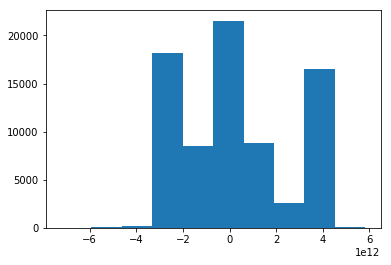

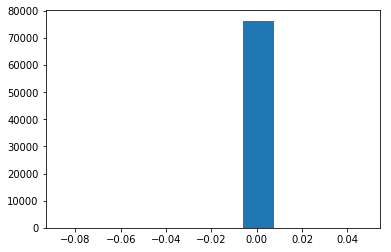

In [655]:
plt.hist(ols.coef_[0])
plt.show()

plt.hist(rdg.coef_[0])
plt.show()

### MODEL: Decision Tree Classifier

In [656]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=100)
dtc.fit(X_matrix, y)
joblib.dump(dtc, 'dtc.pkl') # pickle

dtc_performance = BinaryClassificationPerformance(dtc.predict(X_matrix), y, 'dtc')
dtc_performance.compute_measures()
print(dtc_performance.performance_measures)

{'Pos': 26628, 'Neg': 337372, 'TP': 17908, 'TN': 337343, 'FP': 29, 'FN': 8720, 'Accuracy': 0.9759642857142857, 'Precision': 0.9983832301945699, 'Recall': 0.672525161484152, 'desc': 'dtc'}


### Random Forests

In [657]:
# from sklearn.ensemble import RandomForestClassifier

# #max_depth 10-100, minsamples_split 样本量大增大, n_estimators弱学习最大迭代次数， 太小欠拟合默认100//min_samples_split =120
# rfc = RandomForestClassifier(max_depth= 100,n_estimators=100)
# rfc.fit(X_matrix, y)
# joblib.dump(rfc, 'rfc.pkl')

# rfc_performance = BinaryClassificationPerformance(rfc.predict(X_matrix), y, 'rfc')
# rfc_performance.compute_measures()
# print(rfc_performance.performance_measures)



In [658]:
print(rfc.feature_importances_[-10:])
print(rfc.feature_importances_)

[6.77760181e-06 1.87827566e-08 1.65262321e-06 0.00000000e+00
 0.00000000e+00 3.73695103e-03 1.12879679e-02 2.73729879e-02
 3.84057549e-03 2.24700718e-03]
[9.91328364e-06 3.40642914e-06 2.20254803e-06 ... 2.73729879e-02
 3.84057549e-03 2.24700718e-03]


### ROC plot to compare performance of various models and fits

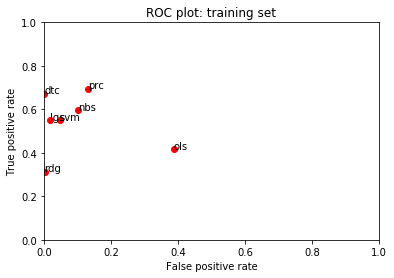

In [661]:
fits = [svm_performance, lgs_performance, rdg_performance, prc_performance, ols_performance, dtc_performance, nbs_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'ro')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## a digression: looking inside the `rdg` object

[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)

In [193]:
dir(rdg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_label_binarizer',
 '_predict_proba_lr',
 '_preprocess_data',
 '_set_intercept',
 'alpha',
 'class_weight',
 'classes_',
 'coef_',
 'copy_X',
 'decision_function',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [28]:
rdg.get_params()

{'alpha': 5,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [29]:
type(rdg.coef_)

numpy.ndarray

In [30]:
rdg.coef_.shape

(1, 131074)

In [31]:
print(rdg.coef_[0])

[-0.00180212 -0.00019406  0.         ... -0.00045842  0.00120984
  0.07918174]


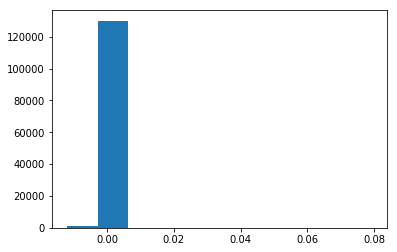

In [32]:
plt.hist(rdg.coef_[0])
plt.show()

# looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [33]:
amazon.loc[0, "Text"]

'We tried I worried work. They work well. My family loved trying them. We enjoyed lunch salad dressing fruit greek yogurt natural. Tasty.<br />The pill hard took moments melt worked right away. It lasted 20-25 minutes active eating. I think acid sour foods washes away. I try again.'

In [34]:
amazon.loc[0, "helpful"]

False

In [35]:
ridge_predictions = rdg.predict(X)

In [36]:
ridge_predictions.shape

(364000,)

In [37]:
print(ridge_predictions)

[False False False ...  True False False]


In [38]:
# false positives

import random, time

for i in range(0, len(ridge_predictions)):
    if (ridge_predictions[i] == True):
        if (amazon.loc[i, "helpful"] == False):
            if (random.uniform(0, 1) < 0.05):
                print(i)
                print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
                print(amazon.loc[i, "Score"])
                print(amazon.loc[i, "HelpfulnessDenominator"])
                print(amazon.loc[i, "ProductId"])
                print(amazon.loc[i, "Text"])
                print('* * * * * * * * * ')

2296
2011-12-10 00:00:00
2
0
B000HDCNMS
The small bag perfect size you're sharing person want quick snack.<br />The popcorn little greasy, it's sooo delicious.<br />The (BIG) problem I bag tends burn, I don't know I'm wrong, I hate it.<br /><br />The time I it: bag super burnt popcorn didn't make, bag inflate. Second time I it, worked fine. Third time, bag burnt, butter melted, big mess.<br /><br />My microwave works fine popcorn, sure wrong.
* * * * * * * * * 
29156
2011-01-26 00:00:00
5
2
B003ULDZLM
*****<br />This yummy unique tea. It's sort creamy (the real vanilla luscious taste), spicy like chai. It absolutely perfect I'm drinking time taste belief, plus it's decaffeinated!<br /><br />Indian Night certified organic contains fair trade certified organic Fatrikcherra Estate black tea, organic vanilla beans---that's all---and oh, incredible combination! There oils natural flavorings all, unlike flavored teas, funny aftertaste. It kosher. This tea sustainable packaging materials biod

238370
2010-04-26 00:00:00
3
1
B000F4IREM
Although low fiber processed oil (sunflower), rice snaps fairly tasty organic. It offers nice break wheat crackers, rice crackers crispy (sharp edged).
* * * * * * * * * 
242923
2012-09-19 00:00:00
5
0
B004AN8Q86
Chances looking Dick Van Patten's Natural Balance, looking finding quality cat food animals. I'm firm believer buying best quality foods animals order ensure optimum good health, especially 2007 pet food recalls melamine adulterated food. Initially, I purchased food didn't factor decision.<br /><br />I long-haired cat gifted hairballs frequent basis. A friend told food swore it, claiming rugs furniture longer suffered constant scrubbing. I decided Natural Balance try amazed results. I longer cat, inherit long-haired cutie pie LOVES food. I changed food month ago, gradually mixing previous food, helps body minimize hairball activity. I want healthy happy expense worth it. This brief blurb website, information bag well:<br /><br />* Fres